In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [3]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s', origin='unix')

In [4]:
nan_2012 = df[df['Timestamp'].dt.year == 2012]['Open'].value_counts(dropna=False)

In [5]:
pd.DataFrame(nan_2012).sum() 

Open    527040
dtype: int64

In [6]:
nan_2012.iloc[0]

500411

In [7]:
years = list(np.arange(2011, 2021, 1))
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [8]:
test = pd.DataFrame(df[df['Timestamp'].dt.year == 2015]['Open'].value_counts(dropna=False)).reset_index()

In [9]:
test.loc[0,'Open']

146393

In [10]:
test['Open'].sum()

519128

In [11]:
def count_na(X):
    years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    missing_values = pd.DataFrame()
    for y in years:
#         nan_Open = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Open'].value_counts(dropna=False)).reset_index()
#         nan_Close = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Close'].value_counts(dropna=False)).reset_index()
        missing_values['year'] = y
        missing_values['total_Open'] = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()
        missing_values['Open_nan'] = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Open'].value_counts(dropna=False)).reset_index().iloc[0,1]
        missing_values['total_Close'] = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Close'].value_counts(dropna=False)).reset_index()['Close'].sum()
        missing_values['Close_nan'] = pd.DataFrame(X[X['Timestamp'].dt.year == y]['Close'].value_counts(dropna=False)).reset_index().iloc[0,1]
        return missing_values
        

In [12]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2014]['Open'].value_counts(dropna=False)).reset_index()

,index,Open
0,NaN,127424
1,450.00,443
2,580.00,430
3,620.00,417
4,622.00,395
...,...,...
47469,882.59,1
47470,787.74,1
47471,551.70,1
47472,945.74,1


In [13]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2015]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()

519128

<AxesSubplot:>

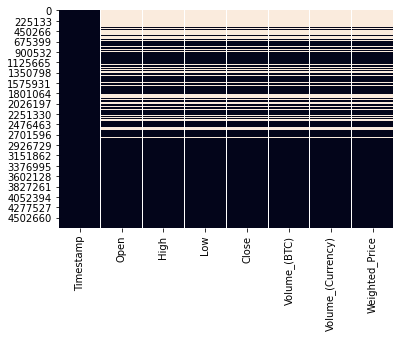

In [14]:
sns.heatmap(df.isnull(), cbar=False)

# Test fonction nan exploration

In [5]:
def monthna(X):
    months = list(np.arange(1,13,1))

    open_nan = []
    open_sum = []

    for x in months:
        open_sum.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum())
        open_nan.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index().iloc[0,1])
       
    M = pd.Series(months)
    ON = pd.Series(open_nan)
    OS = pd.Series(open_sum)
    
    return pd.DataFrame((pd.concat([ON, OS], axis=1).set_index(M))).rename(columns={0:'Count NA Open', 1:'Total Open'})

In [ ]:
def dataframe_year(data):
    year_df = []
    years = list(np.arange(2011, 2021, 1))
    for year in years:
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
        df = data[data['Timestamp'].dt.year == year]
        year_df.append(df)
    return year_df

In [ ]:
year_df = dataframe_year(data)

In [ ]:
year_df = dataframe_year(data)

In [ ]:
def dataframe_month(data):
    
    month_df = []
    year_df = dataframe_year(data)

    for i in range(0, 9):
        month = monthna(year_df[i])
        month['percent NA OP'] = round((month['Count NA Open']/month['Total Open'])*100, 2)
        month = month.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Totaal Close'])
        month_df.append(month_df)

    return month_df[4]

In [ ]:
# dataframe_month(data)

In [ ]:
# [df_month_14, df_month_15, df_month_16, df_month_17, df_month_18, df_month_19, df_month_20]
# df_final = pd.concat([df_month_14, df_month_15, df_month_16, df_month_17, df_month_18, df_month_19, df_month_20], axis= 1)
# df_final

In [15]:
df_test = df.head(50)

In [16]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2011]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()

968

In [17]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2012]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()

527040

In [18]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2013]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()

525600

In [19]:
pd.DataFrame(df[df['Timestamp'].dt.year == 2015]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum()

519128

In [20]:
def countna(X):
    years = list(np.arange(2011,2021,1))
    open_nan = []
    open_sum = []
    close_nan = []
    close_sum = []
    missing_values = pd.DataFrame()


    for x in years:
        open_sum.append(pd.DataFrame(X[X['Timestamp'].dt.year == x]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum())
        open_nan.append(pd.DataFrame(X[X['Timestamp'].dt.year == x]['Open'].value_counts(dropna=False)).reset_index().iloc[0,1])
        close_sum.append(pd.DataFrame(X[X['Timestamp'].dt.year == x]['Close'].value_counts(dropna=False)).reset_index()['Close'].sum())
        close_nan.append(pd.DataFrame(X[X['Timestamp'].dt.year == x]['Close'].value_counts(dropna=False)).reset_index().iloc[0,1])
    Y = pd.Series(years)
    ON = pd.Series(open_nan)
    OS = pd.Series(open_sum)
    CN = pd.Series(close_nan)
    CS =pd.Series(close_sum)
    return pd.DataFrame((pd.concat([ON, OS, CN, CS], axis=1).set_index(Y))).rename(columns={0:'Count NA Open', 1:'Total Open', 2:'Count NA Close', 3:'Total Close'})
#     missing_values['years'] = x
#     missing_values['close'] = 
#     missing_values['nan_close'] =
#     missing_values['open'] = 
#     missing_values['nan_open'] = open_nan

    

In [21]:
years_null = countna(df)

In [22]:
years_null

,Count NA Open,Total Open,Count NA Close,Total Close
2011,964,968,964,968
2012,500411,527040,500411,527040
2013,205839,525600,205839,525600
2014,127424,525600,127424,525600
2015,146393,519128,146393,519128
2016,174941,527040,174941,527040
2017,42268,525600,42268,525600
2018,19827,525600,19827,525600
2019,17260,525600,17260,525600
2020,8145,525601,8145,525601


In [23]:
# PLOTTTTTTTTT et calcul %

In [24]:
df_2014 = df[df['Timestamp'].dt.year == 2014]

In [25]:
df_2014[df_2014['Timestamp'].dt.month == 1]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1053608,2014-01-01 00:00:00,732.00,732.00,732.00,732.00,4.599562,3366.879047,732.000000
1053609,2014-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053610,2014-01-01 00:02:00,732.01,732.75,729.01,729.01,1.138530,830.438062,729.394976
1053611,2014-01-01 00:03:00,730.24,732.76,730.24,732.76,0.121000,88.596624,732.203507
1053612,2014-01-01 00:04:00,732.76,734.00,732.76,734.00,52.120000,38251.836202,733.918576
...,...,...,...,...,...,...,...,...
1098243,2014-01-31 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098244,2014-01-31 23:56:00,801.96,803.00,801.96,803.00,0.996694,800.339793,802.994783
1098245,2014-01-31 23:57:00,802.99,803.00,802.99,803.00,1.466398,1177.516014,802.998923
1098246,2014-01-31 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def monthna(X):
    months = list(np.arange(1,13,1))

    open_nan = []
    open_sum = []
    close_nan = []
    close_sum = []


    for x in months:
        open_sum.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index()['Open'].sum())
        open_nan.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Open'].value_counts(dropna=False)).reset_index().iloc[0,1])
        close_sum.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Close'].value_counts(dropna=False)).reset_index()['Close'].sum())
        close_nan.append(pd.DataFrame(X[X['Timestamp'].dt.month == x]['Close'].value_counts(dropna=False)).reset_index().iloc[0,1])
    M = pd.Series(months)
    ON = pd.Series(open_nan)
    OS = pd.Series(open_sum)
    CN = pd.Series(close_nan)
    CS = pd.Series(close_sum)
    return pd.DataFrame((pd.concat([ON, OS, CN, CS], axis=1).set_index(M))).rename(columns={0:'Count NA Open', 1:'Total Open', 2:'Count NA Close', 3:'Total Close'})
    

In [27]:
df_2014 = df[df['Timestamp'].dt.year == 2014]
df_month_14 = monthna(df_2014)
df_month_14['percent NA OP'] = round((df_month_14['Count NA Open']/df_month_14['Total Open'])*100, 2)
df_month_14['percent NA CL'] = round((df_month_14['Count NA Close']/df_month_14['Total Close'])*100, 2)
df_month_14 = df_month_14.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [28]:
# def all_na(X):
#     years = list(np.arange(2011,2021,1))
#     df_years_list = []
    
#     for y in years:
#         Y = X[X['Timestamp'].dt.year == y]
#         df_years_list.append(monthna(Y))
#         final_df_years = pd.concat(df_years_list)
#     return final_df_years

In [29]:
# all_na(df)

In [30]:
df_2015 = df[df['Timestamp'].dt.year == 2015]
df_month_15 = monthna(df_2015)
df_month_15['percent NA OP'] = round((df_month_15['Count NA Open']/df_month_15['Total Open'])*100, 2)
df_month_15['percent NA CL'] = round((df_month_15['Count NA Close']/df_month_15['Total Close'])*100, 2)
df_month_15 = df_month_15.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [31]:
df_2016 = df[df['Timestamp'].dt.year == 2016]
df_month_16 = monthna(df_2016)
df_month_16['percent NA OP'] = round((df_month_16['Count NA Open']/df_month_16['Total Open'])*100, 2)
df_month_16['percent NA CL'] = round((df_month_16['Count NA Close']/df_month_16['Total Close'])*100, 2)
df_month_16 = df_month_16.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])

In [32]:
df_2017 = df[df['Timestamp'].dt.year == 2017]
df_month_17 = monthna(df_2017)
df_month_17['percent NA OP'] = round((df_month_17['Count NA Open']/df_month_17['Total Open'])*100, 2)
df_month_17['percent NA CL'] = round((df_month_17['Count NA Close']/df_month_17['Total Close'])*100, 2)
df_month_17 = df_month_17.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])
df_month_17 

,percent NA OP,percent NA CL
1,19.62,19.62
2,21.56,21.56
3,14.84,14.84
4,19.17,19.17
5,4.83,4.83
6,3.62,3.62
7,5.01,5.01
8,3.16,3.16
9,1.89,1.89
10,2.94,2.94


In [33]:
df_2018 = df[df['Timestamp'].dt.year == 2018]
df_month_18 = monthna(df_2018)
df_month_18['percent NA OP'] = round((df_month_18['Count NA Open']/df_month_18['Total Open'])*100, 2)
df_month_18['percent NA CL'] = round((df_month_18['Count NA Close']/df_month_18['Total Close'])*100, 2)
df_month_18 = df_month_18.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])
df_month_18

,percent NA OP,percent NA CL
1,0.24,0.24
2,0.19,0.19
3,0.65,0.65
4,0.18,0.18
5,0.25,0.25
6,0.81,0.81
7,1.03,1.03
8,3.59,3.59
9,8.80,8.80
10,14.98,14.98


In [34]:
df_2019 = df[df['Timestamp'].dt.year == 2019]
df_month_19 = monthna(df_2019)
df_month_19['percent NA OP'] = round((df_month_19['Count NA Open']/df_month_19['Total Open'])*100, 2)
df_month_19['percent NA CL'] = round((df_month_19['Count NA Close']/df_month_19['Total Close'])*100, 2)
df_month_19 = df_month_19.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])
df_month_19

,percent NA OP,percent NA CL
1,10.08,10.08
2,8.16,8.16
3,9.08,9.08
4,2.59,2.59
5,0.46,0.46
6,0.30,0.30
7,0.80,0.80
8,1.54,1.54
9,3.21,3.21
10,0.43,0.43


In [35]:
df_2020 = df[df['Timestamp'].dt.year == 2020]
df_month_20 = monthna(df_2020)
df_month_20['percent NA OP'] = round((df_month_20['Count NA Open']/df_month_20['Total Open'])*100, 2)
df_month_20['percent NA CL'] = round((df_month_20['Count NA Close']/df_month_20['Total Close'])*100, 2)
df_month_20 = df_month_20.drop(columns=['Count NA Open', 'Total Open', 'Count NA Close', 'Total Close'])
df_month_20

,percent NA OP,percent NA CL
1,0.56,0.56
2,0.09,0.13
3,0.81,0.81
4,3.90,3.90
5,1.19,1.19
6,2.62,2.62
7,3.99,3.99
8,1.09,1.09
9,1.42,1.42
10,2.45,2.45


In [36]:
[df_month_14, df_month_15, df_month_16, df_month_17, df_month_18, df_month_19, df_month_20]
df_final = pd.concat([df_month_14, df_month_15, df_month_16, df_month_17, df_month_18, df_month_19, df_month_20], axis= 1)
df_final

,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL,percent NA OP,percent NA CL
1,13.00,13.00,17.45,17.45,25.02,25.02,19.62,19.62,0.24,0.24,10.08,10.08,0.56,0.56
2,12.09,12.09,29.50,29.50,25.24,25.24,21.56,21.56,0.19,0.19,8.16,8.16,0.09,0.13
3,20.90,20.90,30.62,30.62,24.96,24.96,14.84,14.84,0.65,0.65,9.08,9.08,0.81,0.81
4,25.55,25.55,25.15,25.15,22.73,22.73,19.17,19.17,0.18,0.18,2.59,2.59,3.90,3.90
5,31.76,31.76,33.70,33.70,39.53,39.53,4.83,4.83,0.25,0.25,0.46,0.46,1.19,1.19
6,30.88,30.88,28.67,28.67,28.17,28.17,3.62,3.62,0.81,0.81,0.30,0.30,2.62,2.62
7,38.56,38.56,31.58,31.58,44.04,44.04,5.01,5.01,1.03,1.03,0.80,0.80,3.99,3.99
8,28.43,28.43,34.10,34.10,37.53,37.53,3.16,3.16,3.59,3.59,1.54,1.54,1.09,1.09
9,22.18,22.18,34.30,34.30,39.74,39.74,1.89,1.89,8.80,8.80,3.21,3.21,1.42,1.42
10,18.30,18.30,30.13,30.13,41.73,41.73,2.94,2.94,14.98,14.98,0.43,0.43,2.45,2.45


In [37]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4727772,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


In [38]:
df_2017[df_2017['Timestamp'].dt.month == 5]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2798176,2017-05-01 00:00:00,1348.88,1354.80,1348.88,1354.80,3.087374,4173.722673,1351.868203
2798177,2017-05-01 00:01:00,1352.41,1352.41,1352.41,1352.41,0.261954,354.269412,1352.410000
2798178,2017-05-01 00:02:00,1349.49,1354.86,1349.49,1354.86,0.096311,130.384815,1353.783259
2798179,2017-05-01 00:03:00,1350.11,1351.25,1350.11,1351.25,0.260284,351.553973,1350.655803
2798180,2017-05-01 00:04:00,1351.25,1351.25,1349.52,1349.52,1.089116,1470.056120,1349.769693
...,...,...,...,...,...,...,...,...
2842811,2017-05-31 23:55:00,2294.47,2294.47,2292.37,2292.37,5.240379,12023.062444,2294.311412
2842812,2017-05-31 23:56:00,2294.37,2295.62,2293.01,2293.01,7.497070,17202.712207,2294.591381
2842813,2017-05-31 23:57:00,2296.34,2299.71,2293.00,2293.00,4.031468,9267.382885,2298.761537
2842814,2017-05-31 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_2020[df_2020['Timestamp'].dt.month == 12]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4684576,2020-12-01 00:00:00,19703.53,19731.24,19695.00,19731.24,2.940703,57977.522998,19715.528676
4684577,2020-12-01 00:01:00,19711.96,19730.59,19656.50,19676.78,9.383595,184784.352760,19692.278005
4684578,2020-12-01 00:02:00,19685.16,19711.11,19660.12,19711.11,5.101029,100466.975680,19695.431724
4684579,2020-12-01 00:03:00,19711.11,19711.11,19660.84,19668.82,1.537507,30252.192695,19676.127166
4684580,2020-12-01 00:04:00,19655.00,19655.00,19587.56,19608.70,15.403176,302166.166090,19617.134016
...,...,...,...,...,...,...,...,...
4727772,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


In [40]:
4727776 - 2798176

1929600

In [41]:
2798176 + (1929600/10)

2991136.0

In [42]:
2991136.0 + (1929600/10)

3184096.0

In [43]:
2991136.0 + (1929600/10)

3184096.0

In [44]:
x = 2798176
a = 1929600/10
index_list = []
while x < 4727776:
    index_list.append(x+a)
    x = x + a
print(index_list)
    

[2991136.0, 3184096.0, 3377056.0, 3570016.0, 3762976.0, 3955936.0, 4148896.0, 4341856.0, 4534816.0, 4727776.0]


In [45]:
# list_df_i = []
# for x in index_list:
#     L = f"{x} ':' {index_list[(index_list.index(x))+1]}"
#     list_df_i.append([L])
    

In [46]:
index_list[0]

2991136.0

In [47]:
(f"(2798176 : {round(index_list[0])})")

index_df = []
for i in range(9):
    index_df.append((f"({round(index_list[i])}:{round(index_list[i+1])})"))
print(index_df)

['(2991136:3184096)', '(3184096:3377056)', '(3377056:3570016)', '(3570016:3762976)', '(3762976:3955936)', '(3955936:4148896)', '(4148896:4341856)', '(4341856:4534816)', '(4534816:4727776)']


In [72]:
df_1 = df[2798176:2991136]
df_2 = df[2991137:3184096]
df_3 = df[3184097:3377056]
df_4 = df[3377057:3570016]
df_5 = df[3570017:3762976]
df_6 = df[3762977:3955936]
df_7 = df[3955937:4148896]
df_8 = df[4148897:4341856]
df_9 = df[4341857:4534816]
df_10 = df[4534817:4727776]
df_11 = df[4527776:4727776]

In [71]:
4727776 - 200000

4527776

In [73]:
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11]
df_open = []
for x in df_list:
    x = x.drop(columns=['High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'])
    df_open.append(x)

In [221]:
df_open

[                  Timestamp     Open
 2798176 2017-05-01 00:00:00  1348.88
 2798177 2017-05-01 00:01:00  1352.41
 2798178 2017-05-01 00:02:00  1349.49
 2798179 2017-05-01 00:03:00  1350.11
 2798180 2017-05-01 00:04:00  1351.25
 ...                     ...      ...
 2991131 2017-09-11 23:55:00  4199.92
 2991132 2017-09-11 23:56:00  4199.78
 2991133 2017-09-11 23:57:00  4199.96
 2991134 2017-09-11 23:58:00  4197.96
 2991135 2017-09-11 23:59:00      NaN
 
 [192960 rows x 2 columns],
                   Timestamp      Open
 2991137 2017-09-12 00:01:00       NaN
 2991138 2017-09-12 00:02:00   4206.82
 2991139 2017-09-12 00:03:00   4211.95
 2991140 2017-09-12 00:04:00   4210.99
 2991141 2017-09-12 00:05:00   4213.30
 ...                     ...       ...
 3184091 2018-01-23 23:55:00  10805.41
 3184092 2018-01-23 23:56:00  10813.90
 3184093 2018-01-23 23:57:00  10812.38
 3184094 2018-01-23 23:58:00  10812.74
 3184095 2018-01-23 23:59:00  10849.41
 
 [192959 rows x 2 columns],
                

In [74]:
df_1_final = df_open[0]
df_2_final = df_open[1]
df_3_final = df_open[2]
df_4_final = df_open[3]
df_5_final = df_open[4]
df_6_final = df_open[5]
df_7_final = df_open[6]
df_8_final = df_open[7]
df_9_final = df_open[8]
df_10_final = df_open[9]
df_11_final = df_open[10]

In [80]:
# df_10_final

In [75]:
df_11_final

,Timestamp,Open
4527776,2020-08-14 02:40:00,11755.46
4527777,2020-08-14 02:41:00,11756.04
4527778,2020-08-14 02:42:00,11759.49
4527779,2020-08-14 02:43:00,11759.49
4527780,2020-08-14 02:44:00,11756.43
...,...,...
4727771,2020-12-30 23:55:00,28809.07
4727772,2020-12-30 23:56:00,28801.47
4727773,2020-12-30 23:57:00,28829.42
4727774,2020-12-30 23:58:00,28850.49


In [53]:
# df_10_train = df_10_final[0:189359]
# df_10_test = df_10_final[189360:192958]

In [155]:
df_11_train = df_11_final[0:196399]
df_11_test = df_11_final[196400:200000]

In [156]:
# df_10_train

In [157]:
# df_10_test

In [158]:
df_11_train

,Timestamp,Open
4527776,2020-08-14 02:40:00,11755.46
4527777,2020-08-14 02:41:00,11756.04
4527778,2020-08-14 02:42:00,11759.49
4527779,2020-08-14 02:43:00,11759.49
4527780,2020-08-14 02:44:00,11756.43
...,...,...
4724170,2020-12-28 11:54:00,26791.42
4724171,2020-12-28 11:55:00,26793.45
4724172,2020-12-28 11:56:00,26793.06
4724173,2020-12-28 11:57:00,26803.58


In [159]:
# for i in range(1, 61):
#     df_10_train[f't - {i}'] = df_10_train['Open'].shift(i)
# df_10_train.dropna(inplace=True) 

In [160]:
# df_10_train

In [147]:
# df_10_test

In [166]:
for i in range(1, 61):
    df_11_train[f't - {i}'] = df_11_train['Open'].shift(i)
df_11_train.dropna(inplace=True) 

<ipython-input-166-4879f34c5790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_train[f't - {i}'] = df_11_train['Open'].shift(i)
<ipython-input-166-4879f34c5790>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_train.dropna(inplace=True)


In [167]:
df_11_train

,Timestamp,Open,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,...,t - 51,t - 52,t - 53,t - 54,t - 55,t - 56,t - 57,t - 58,t - 59,t - 60
4527836,2020-08-14 03:40:00,11743.58,11752.68,11743.61,11747.97,11754.78,11746.96,11748.36,11751.34,11754.58,...,11760.58,11754.13,11760.17,11751.23,11759.70,11756.43,11759.49,11759.49,11756.04,11755.46
4527837,2020-08-14 03:41:00,11742.09,11743.58,11752.68,11743.61,11747.97,11754.78,11746.96,11748.36,11751.34,...,11760.05,11760.58,11754.13,11760.17,11751.23,11759.70,11756.43,11759.49,11759.49,11756.04
4527838,2020-08-14 03:42:00,11745.58,11742.09,11743.58,11752.68,11743.61,11747.97,11754.78,11746.96,11748.36,...,11760.67,11760.05,11760.58,11754.13,11760.17,11751.23,11759.70,11756.43,11759.49,11759.49
4527839,2020-08-14 03:43:00,11744.29,11745.58,11742.09,11743.58,11752.68,11743.61,11747.97,11754.78,11746.96,...,11756.04,11760.67,11760.05,11760.58,11754.13,11760.17,11751.23,11759.70,11756.43,11759.49
4527840,2020-08-14 03:44:00,11736.23,11744.29,11745.58,11742.09,11743.58,11752.68,11743.61,11747.97,11754.78,...,11750.27,11756.04,11760.67,11760.05,11760.58,11754.13,11760.17,11751.23,11759.70,11756.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724170,2020-12-28 11:54:00,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,26838.67,26806.20,...,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83,26656.97,26622.25,26581.93
4724171,2020-12-28 11:55:00,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,26838.67,...,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83,26656.97,26622.25
4724172,2020-12-28 11:56:00,26793.06,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,...,26660.55,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83,26656.97
4724173,2020-12-28 11:57:00,26803.58,26793.06,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,...,26721.08,26660.55,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83


In [151]:
df_11_test

,Timestamp,Open
4724176,2020-12-28 12:00:00,26811.97
4724177,2020-12-28 12:01:00,26788.46
4724178,2020-12-28 12:02:00,26776.75
4724179,2020-12-28 12:03:00,26809.09
4724180,2020-12-28 12:04:00,26758.58
...,...,...
4727771,2020-12-30 23:55:00,28809.07
4727772,2020-12-30 23:56:00,28801.47
4727773,2020-12-30 23:57:00,28829.42
4727774,2020-12-30 23:58:00,28850.49


In [152]:
# for i in range(1, 61):
#     df_10_test[f't - {i}'] = df_10_test['Open'].shift(i)
# df_10_test.dropna(inplace=True) 

In [153]:
for i in range(1, 61):
    df_11_test[f't - {i}'] = df_11_test['Open'].shift(i)
df_11_test.dropna(inplace=True) 

<ipython-input-153-170e4ed70fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_test[f't - {i}'] = df_11_test['Open'].shift(i)
<ipython-input-153-170e4ed70fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_test.dropna(inplace=True)


In [154]:
df_11_test

,Timestamp,Open,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,...,t - 51,t - 52,t - 53,t - 54,t - 55,t - 56,t - 57,t - 58,t - 59,t - 60
4724236,2020-12-28 13:00:00,27068.47,27064.86,27073.03,27073.19,27067.42,26980.73,26984.42,27022.15,26969.30,...,26693.87,26708.66,26700.02,26684.52,26712.69,26758.58,26809.09,26776.75,26788.46,26811.97
4724237,2020-12-28 13:01:00,27138.79,27068.47,27064.86,27073.03,27073.19,27067.42,26980.73,26984.42,27022.15,...,26731.70,26693.87,26708.66,26700.02,26684.52,26712.69,26758.58,26809.09,26776.75,26788.46
4724238,2020-12-28 13:02:00,27219.17,27138.79,27068.47,27064.86,27073.03,27073.19,27067.42,26980.73,26984.42,...,26767.59,26731.70,26693.87,26708.66,26700.02,26684.52,26712.69,26758.58,26809.09,26776.75
4724239,2020-12-28 13:03:00,27200.91,27219.17,27138.79,27068.47,27064.86,27073.03,27073.19,27067.42,26980.73,...,26752.55,26767.59,26731.70,26693.87,26708.66,26700.02,26684.52,26712.69,26758.58,26809.09
4724240,2020-12-28 13:04:00,27192.79,27200.91,27219.17,27138.79,27068.47,27064.86,27073.03,27073.19,27067.42,...,26725.41,26752.55,26767.59,26731.70,26693.87,26708.66,26700.02,26684.52,26712.69,26758.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727771,2020-12-30 23:55:00,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,28871.54,28883.69,...,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63,28702.93,28658.93,28671.29
4727772,2020-12-30 23:56:00,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,28871.54,...,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63,28702.93,28658.93
4727773,2020-12-30 23:57:00,28829.42,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,...,28752.81,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63,28702.93
4727774,2020-12-30 23:58:00,28850.49,28829.42,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,...,28789.41,28752.81,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63


In [61]:
# X10_train = df_10_train.drop(columns=['Open'])
# y10_train = df_10_train['Open']
# X10_test = df_10_test.drop(columns=['Open'])
# y10_test = df_10_test['Open']

In [66]:
X10_train

,Timestamp,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,...,t - 51,t - 52,t - 53,t - 54,t - 55,t - 56,t - 57,t - 58,t - 59,t - 60
4534877,2020-08-19 01:01:00,11992.37,11984.15,11974.20,11979.19,11971.35,11973.04,11978.49,11976.37,11982.49,...,11960.08,11964.27,11955.46,11963.37,11960.25,11966.11,11970.61,11963.63,11976.46,11978.73
4534878,2020-08-19 01:02:00,11996.34,11992.37,11984.15,11974.20,11979.19,11971.35,11973.04,11978.49,11976.37,...,11954.95,11960.08,11964.27,11955.46,11963.37,11960.25,11966.11,11970.61,11963.63,11976.46
4534879,2020-08-19 01:03:00,11998.73,11996.34,11992.37,11984.15,11974.20,11979.19,11971.35,11973.04,11978.49,...,11943.00,11954.95,11960.08,11964.27,11955.46,11963.37,11960.25,11966.11,11970.61,11963.63
4534880,2020-08-19 01:04:00,12000.24,11998.73,11996.34,11992.37,11984.15,11974.20,11979.19,11971.35,11973.04,...,11960.04,11943.00,11954.95,11960.08,11964.27,11955.46,11963.37,11960.25,11966.11,11970.61
4534881,2020-08-19 01:05:00,11999.56,12000.24,11998.73,11996.34,11992.37,11984.15,11974.20,11979.19,11971.35,...,11946.45,11960.04,11943.00,11954.95,11960.08,11964.27,11955.46,11963.37,11960.25,11966.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724171,2020-12-28 11:55:00,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,26838.67,26806.20,...,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83,26656.97,26622.25
4724172,2020-12-28 11:56:00,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,26838.67,...,26660.55,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83,26656.97
4724173,2020-12-28 11:57:00,26793.06,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,26807.70,...,26721.08,26660.55,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77,26635.83
4724174,2020-12-28 11:58:00,26803.58,26793.06,26793.45,26791.42,26801.66,26796.40,26790.00,26816.27,26822.17,...,26742.83,26721.08,26660.55,26645.78,26678.46,26689.17,26692.61,26686.23,26667.36,26693.77


In [68]:
pd.DataFrame(y10_train)

,Open
4534877,11996.34
4534878,11998.73
4534879,12000.24
4534880,11999.56
4534881,12006.76
...,...
4724171,26793.45
4724172,26793.06
4724173,26803.58
4724174,26803.62


In [169]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# model = LinearRegression()
# model = model.fit(X10_train, y10_train)

# print('R2: ', r2_score(y10_test, model.predict(X10_test)))

DATA
upload data
GCP
upload data gcp

clean : NaN

PARAMS.gcp

PARAMS.trainer

TRAINER
cree train test split avec hyperparametres
fonction window train
fonction window test
fit
params utilisé -> mlflow -> gcp

Grid search  ? model ? 

fichier model

trainer 
appelé fichier model
fit



In [220]:
# def input_data():


df_12 = df[4527776:4727776]

df_list_12 = [df_12]
df_open_12 = []

for x in df_list_12:
    x = x.drop(columns=['High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'])
    df_open_12.append(x)
    

df_12_final = df_open_12[0]

df_12_final.fillna(method='backfill', inplace=True)
df_12_final.isna().sum()

for i in range(1, 61):
    df_12_final[f't - {i}'] = df_12_final['Open'].shift(i)
df_12_final.dropna(inplace=True) 

# X12 = df_12_final.drop(columns=['Open'])
X12 = df_12_final.drop(columns=['Open', 'Timestamp'])
y12 = df_12_final['Open']


X12_train = X12[0:129600]
y12_train = y12[0:129600]
X12_test = X12[129601:199940]
y12_test = y12[129601:199940]

In [314]:
def input_data(data, sample_size, shift_size, train_size):

    data_size = data.shape[0]
    sample = data.iloc[(data_size-sample_size):data_size]
    sample_pp = sample[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='backfill')


    for i in range(1, shift_size+1):
        sample_pp[f't - {i}'] = sample_pp['Open'].shift(i)
    sample_shifted = sample_pp.dropna() 


    X = sample_shifted.drop(columns=['Open'])
    y = sample_shifted['Open']


    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size]
    X_test = X.iloc[(train_size+1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+1):(sample_size-shift_size)]
    
    return X_train, X_test, y_train, y_test

In [349]:
df.set_index("Timestamp")["2020-08-01":"2020-10-01"]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-08-01 00:00:00,11357.98,11375.78,11357.98,11375.78,5.268972,59881.156482,11364.864286
2020-08-01 00:01:00,11375.78,11400.22,11375.78,11398.22,16.805971,191366.310950,11386.804592
2020-08-01 00:02:00,11395.75,11405.17,11394.76,11394.76,9.431281,107517.856420,11400.132411
2020-08-01 00:03:00,11400.10,11411.22,11390.88,11390.88,7.764243,88546.124740,11404.346891
2020-08-01 00:04:00,11394.85,11399.93,11392.71,11397.70,5.750045,65533.269194,11397.001398
...,...,...,...,...,...,...,...
2020-10-01 23:55:00,10613.93,10613.93,10613.93,10613.93,0.017220,182.774953,10613.930000
2020-10-01 23:56:00,10617.30,10617.70,10614.40,10614.40,0.811002,8609.667266,10616.085570
2020-10-01 23:57:00,10621.29,10621.29,10615.01,10615.01,0.315917,3354.179147,10617.282714


In [4]:
test_df = pd.DataFrame(
    {"Open": range(1, 21), "Timestamp": pd.date_range("2021-01-01", periods=20, freq="D")}
)
test_df

,Open,Timestamp
0,1,2021-01-01
1,2,2021-01-02
2,3,2021-01-03
3,4,2021-01-04
4,5,2021-01-05
5,6,2021-01-06
6,7,2021-01-07
7,8,2021-01-08
8,9,2021-01-09
9,10,2021-01-10


# input_data function 

In [395]:
def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    
    data_size = data.shape[0]
    sample = data.iloc[(data_size-sample_size-w):data_size-w]
    sample_pp = sample[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='backfill')


    for i in range(0, shift_size):
        sample_pp[f't-{i}'] = sample_pp['Open'].shift(i)
    sample_shifted = sample_pp.dropna() 


    X = sample_shifted.drop(columns=['Open'])
    y = sample_shifted['Open'].shift(-h).rename(f"t+{h}")


    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size] #[0+h:train_size+h]
    
    X_test = X.iloc[(train_size+h-1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+h-1):(sample_size-shift_size)] #[(train_size+(h*2)+1):(sample_size-shift_size)] 
    
    return X_train, X_test, y_train, y_test

In [398]:
X_train, X_test, y_train, y_test = input_data(test_df, 15, 3, 5, h=1)

In [399]:
X_train, y_train, X_test, y_test

(            t-0   t-1   t-2
 Timestamp                  
 2021-01-08    8   7.0   6.0
 2021-01-09    9   8.0   7.0
 2021-01-10   10   9.0   8.0
 2021-01-11   11  10.0   9.0
 2021-01-12   12  11.0  10.0,
 Timestamp
 2021-01-08     9.0
 2021-01-09    10.0
 2021-01-10    11.0
 2021-01-11    12.0
 2021-01-12    13.0
 Name: t+1, dtype: float64,
             t-0   t-1   t-2
 Timestamp                  
 2021-01-13   13  12.0  11.0
 2021-01-14   14  13.0  12.0
 2021-01-15   15  14.0  13.0
 2021-01-16   16  15.0  14.0
 2021-01-17   17  16.0  15.0
 2021-01-18   18  17.0  16.0
 2021-01-19   19  18.0  17.0,
 Timestamp
 2021-01-13    14.0
 2021-01-14    15.0
 2021-01-15    16.0
 2021-01-16    17.0
 2021-01-17    18.0
 2021-01-18    19.0
 2021-01-19    20.0
 Name: t+1, dtype: float64)

# input_data fucntion sample with dates

In [ ]:
def input_data(data, data_start, data_end, sample_size, w=0, shift_size, train_size, h=0):
    
    if data_start != None:
        elif data_end != None:
            sample = data[:]
            
    
    data_size = data.shape[0]
    sample = data.iloc[(data_size-sample_size-w):data_size-w]
    sample_pp = sample[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='backfill')


    for i in range(1, shift_size+1):
        sample_pp[f't - {i}'] = sample_pp['Open'].shift(i)
    sample_shifted = sample_pp.dropna() 


    X = sample_shifted.drop(columns=['Open'])
    y = sample_shifted['Open']


    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0+h:train_size+h]
    
    X_test = X.iloc[(train_size+h+1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+(h*2)+1):(sample_size-shift_size)] 
    
 
    return X_train, X_test, y_train, y_test

In [405]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


# input_data function last version

In [18]:
def preprocessing_data(data, shift_size, h=1, test=False):
    
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp = data_pp.dropna()
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna() 
    
    
    data_shifted['diff_open'] = data_shifted['Open'].diff(h)
    
    X = data_shifted.drop(columns=['Open'])
    y = data_shifted['diff_open'].rename(f"t+{h}").map(lambda x: 0 if x <= 0 else 1)
    
    return X, y 


def input_data(data_shifted, sample_size, shift_size, train_size, h=1, w=0):
    
    data_size = data_pp.shape[0]
    sample = data.iloc[(data_size-sample_size-w):data_size-w]

    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size] 
    
    X_test = X.iloc[(train_size+h-1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+h-1):(sample_size-shift_size)] 
    
    
    return X_train, X_test, y_train, y_test

# Mini-function test

In [5]:
def preprocessing_data_test(data, shift_size, h=3, test=False):
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    # data_pp['open_diff'] = data_pp['Open'].diff()
    data_pp = data_pp.dropna()
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna() 
    
    
    X = data_shifted.drop(columns=['Open'])
    y = data_shifted['Open'].diff(h).rename(f"t+{h}")
    
    # y = data_shifted['Open'].shift(-h).rename(f"t+{h}")
    
    return X, y 

In [8]:
def preprocessing_data_test2(data, shift_size, h=1, test=False):
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp = data_pp.dropna()
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna() 
    
    
    data_shifted['diff_open'] = data_shifted['Open'].diff(h)
    X = data_shifted.drop(columns=['Open'])
    y = data_shifted['diff_open'].rename(f"t+{h}").map(lambda x: 0 if x <= 0 else 1)
    
    return X, y 

TOD DO prendre input date, changer facilement heure to minute!!! 

In [9]:
preprocessing_data_test2(test_df, 5, h=3)

<ipython-input-8-4cfd58f4a7f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shifted['diff_open'] = data_shifted['Open'].diff(h)


(            t-0   t-1   t-2   t-3   t-4  diff_open
 Timestamp                                         
 2021-01-05    5   4.0   3.0   2.0   1.0        NaN
 2021-01-06    6   5.0   4.0   3.0   2.0        NaN
 2021-01-07    7   6.0   5.0   4.0   3.0        NaN
 2021-01-08    8   7.0   6.0   5.0   4.0        3.0
 2021-01-09    9   8.0   7.0   6.0   5.0        3.0
 2021-01-10   10   9.0   8.0   7.0   6.0        3.0
 2021-01-11   11  10.0   9.0   8.0   7.0        3.0
 2021-01-12   12  11.0  10.0   9.0   8.0        3.0
 2021-01-13   13  12.0  11.0  10.0   9.0        3.0
 2021-01-14   14  13.0  12.0  11.0  10.0        3.0
 2021-01-15   15  14.0  13.0  12.0  11.0        3.0
 2021-01-16   16  15.0  14.0  13.0  12.0        3.0
 2021-01-17   17  16.0  15.0  14.0  13.0        3.0
 2021-01-18   18  17.0  16.0  15.0  14.0        3.0
 2021-01-19   19  18.0  17.0  16.0  15.0        3.0
 2021-01-20   20  19.0  18.0  17.0  16.0        3.0,
 Timestamp
 2021-01-05    1
 2021-01-06    1
 2021-01-07    1
 

In [31]:
preprocessing_data_test(test_df, 5)

(            open_diff  t-0   t-1   t-2   t-3   t-4
 Timestamp                                         
 2021-01-06        1.0    6   5.0   4.0   3.0   2.0
 2021-01-07        1.0    7   6.0   5.0   4.0   3.0
 2021-01-08        1.0    8   7.0   6.0   5.0   4.0
 2021-01-09        1.0    9   8.0   7.0   6.0   5.0
 2021-01-10        1.0   10   9.0   8.0   7.0   6.0
 2021-01-11        1.0   11  10.0   9.0   8.0   7.0
 2021-01-12        1.0   12  11.0  10.0   9.0   8.0
 2021-01-13        1.0   13  12.0  11.0  10.0   9.0
 2021-01-14        1.0   14  13.0  12.0  11.0  10.0
 2021-01-15        1.0   15  14.0  13.0  12.0  11.0
 2021-01-16        1.0   16  15.0  14.0  13.0  12.0
 2021-01-17        1.0   17  16.0  15.0  14.0  13.0
 2021-01-18        1.0   18  17.0  16.0  15.0  14.0
 2021-01-19        1.0   19  18.0  17.0  16.0  15.0
 2021-01-20        1.0   20  19.0  18.0  17.0  16.0,
 Timestamp
 2021-01-06    NaN
 2021-01-07    NaN
 2021-01-08    NaN
 2021-01-09    3.0
 2021-01-10    3.0
 2021-01-

# preprocessing data and input_data function workflow

In [ ]:
def preprocessing_data(data, test=False):
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp['open_diff'] = data_pp['Open'].diff()
    data_pp = data_pp.dropna()
    
    return data_pp



def input_data(data_pp, sample_size, shift_size, train_size, h=1, w=0):
    
    data_size = data_pp.shape[0]
    sample = data.iloc[(data_size-sample_size-w):data_size-w] 
    
    for i in range(0, shift_size):
        sample[f't-{i}'] = sample['Open'].shift(i)
    sample_shifted = sample.dropna() 
    
    
#    encoding???
    sample['encoded'] = sample['Open_diff'].map(lambda x: 0 if x <= 0 else 1)
    

    X = sample_shifted.drop(columns=['Open'])
    y = sample_shifted['Open'].shift(-h).rename(f"t+{h}")
    
    

    

    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size] #[0+h:train_size+h]
    
    X_test = X.iloc[(train_size+h-1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+h-1):(sample_size-shift_size)] #[(train_size+(h*2)+1):(sample_size-shift_size)] 
    
    
    return X_train, X_test, y_train, y_test

In [57]:
def preprocessing_data(data, shift_size, h=1):
    
    data = data[2798176:4727776]
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp = data_pp.dropna()
    
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    
    data_pp[f"t+{h}"]= data_pp['diff_Open'].shift(-h)

    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    
    
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"]
    y[y > 0] = 1
    y[y <= 0] = 0

    
    return X, y, data_shifted


def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    
    X, y, data_shifted = preprocessing_data(data, shift_size, h)
    
    data_size = data_shifted.shape[0]
    sample = data_shifted.iloc[(data_size-sample_size-w):data_size-w]

    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size] 
    
    X_test = X.iloc[(train_size+h-1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+h-1):(sample_size-shift_size)] 
    
    
    return X_train, X_test, y_train, y_test

In [10]:
X, y = preprocessing_data(data, 60, h=2)

In [6]:
X

,t-0,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-50,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31 08:51:00,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,...,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39
2011-12-31 08:52:00,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,...,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39
2011-12-31 08:53:00,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,...,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39
2011-12-31 08:54:00,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,...,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39
2011-12-31 08:55:00,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,...,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:56:00,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,28871.54,28883.69,...,28752.81,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63,28702.93
2020-12-30 23:57:00,28829.42,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,28871.54,...,28789.41,28752.81,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94,28742.63
2020-12-30 23:58:00,28850.49,28829.42,28801.47,28809.07,28800.00,28814.36,28826.49,28836.97,28816.76,28844.56,...,28773.99,28789.41,28752.81,28747.02,28749.00,28732.71,28709.40,28746.42,28731.27,28760.94


In [36]:
pd.DataFrame(y_pp)

,t+2
Timestamp,
2011-12-31 08:51:00,0.00
2011-12-31 08:52:00,0.00
2011-12-31 08:53:00,0.00
2011-12-31 08:54:00,0.00
2011-12-31 08:55:00,0.00
...,...
2020-12-30 23:56:00,49.02
2020-12-30 23:57:00,81.12
2020-12-30 23:58:00,42.72


In [11]:
pd.DataFrame(y)

,t+2
Timestamp,
2011-12-31 08:51:00,0
2011-12-31 08:52:00,0
2011-12-31 08:53:00,0
2011-12-31 08:54:00,0
2011-12-31 08:55:00,0
...,...
2020-12-30 23:54:00,1
2020-12-30 23:55:00,1
2020-12-30 23:56:00,1


In [13]:
data_test = data[2798176:4727776]

In [16]:
data = data[2798176:4727776]
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
data_pp = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
data_pp = data_pp.dropna()
    
data_pp['diff_Open'] = data_pp['Open'].diff()
data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    

In [17]:
data_pp

,Open,diff_Open
Timestamp,,


In [38]:
d = pd.Series(np.random.normal(size=50))

In [39]:
d

0     0.089008
1    -0.252834
2     1.240096
3     0.402662
4    -0.367518
5    -0.199361
6    -1.548549
7     0.623882
8     1.513610
9     0.843838
10   -0.869712
11   -0.217979
12    0.077405
13   -0.668632
14   -0.532786
15    0.723214
16   -0.555963
17   -0.523079
18   -0.816424
19    0.984190
20   -0.260412
21    0.521367
22   -0.107331
23    0.252422
24   -0.138500
25    0.693903
26   -0.849164
27    2.293816
28    0.687495
29   -2.177513
30    1.172580
31   -0.426333
32   -1.663206
33    0.087040
34    0.719414
35   -0.609291
36   -0.375786
37   -0.496515
38    3.052356
39   -0.604353
40    0.848436
41    1.216538
42   -1.097737
43   -1.082376
44    0.579498
45   -1.436146
46    0.043566
47    0.105470
48    0.036266
49   -0.067789
dtype: float64

In [43]:
d[d > 0] = 1
d[d <= 0] = 0

In [44]:
d

0     1.0
1     0.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    1.0
22    0.0
23    1.0
24    0.0
25    1.0
26    0.0
27    1.0
28    1.0
29    0.0
30    1.0
31    0.0
32    0.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    1.0
39    0.0
40    1.0
41    1.0
42    0.0
43    0.0
44    1.0
45    0.0
46    1.0
47    1.0
48    1.0
49    0.0
dtype: float64

In [50]:
d = pd.DataFrame(d)

In [47]:
h=2

In [53]:
d = pd.DataFrame(d[0].rename('yo'))

In [54]:
d

,yo
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


In [55]:
d[f"t+{h}"] = d['yo']

In [56]:
d

,yo,t+2
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [131]:
def get_data():
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # client = storage.Client()
    # data = pd.read_csv(f"gs://{BUCKET_NAME}/{BUCKET_TRAIN_DATA_PATH}")
    data = pd.read_csv('../raw_data/bitstampUSD.csv')
    # data = pd.read_csv('gs://bitcoin-prediction-01/data/bitstampUSD.csv')
    data = data[2798176:4727776]
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
    data = data[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data = data.dropna()
    
    return data



def preprocessing_data(data, shift_size, h=1):
    
    data_pp = data[2798176:4727776]
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp
    
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h) 
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"]
    
    y[y > 0] = 1
    y[y <= 0] = 0
    
    return X, y, data_shifted


def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    
    X, y, data_shifted = preprocessing_data(data, shift_size, h)
    
    data_size = data_shifted.shape[0]
    sample_X = X.iloc[(data_size-sample_size-w):data_size-w]
    sample_y = y.iloc[(data_size-sample_size-w):data_size-w]
    
    
    X_train = sample_X.iloc[0:train_size]
    y_train = sample_y.iloc[0:train_size] 
    X_test = sample_X.iloc[(train_size+h-1):(sample_size)]
    y_test = sample_y.iloc[(train_size+h-1):(sample_size)] 
    
    
    
    return X_train, X_test, y_train, y_test

In [132]:
X_train, X_test, y_train, y_test = input_data(data, 1000, 5, 700, h=2, w=0)

<ipython-input-131-4a37240ef958>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
/home/ameliearaji/.pyenv/versions/3.8.6/envs/bitcoin/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/ameliearaji/.pyenv/versions/3.8.6/envs/bitcoin/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [136]:
X_train

,t-0,t-1,t-2,t-3,t-4
Timestamp,,,,,
2020-12-30 07:18:00,28373.01,28380.52,28329.50,28411.70,28441.52
2020-12-30 07:19:00,28362.40,28373.01,28380.52,28329.50,28411.70
2020-12-30 07:20:00,28364.30,28362.40,28373.01,28380.52,28329.50
2020-12-30 07:21:00,28361.15,28364.30,28362.40,28373.01,28380.52
2020-12-30 07:22:00,28352.65,28361.15,28364.30,28362.40,28373.01
...,...,...,...,...,...
2020-12-30 18:53:00,28440.63,28494.35,28508.52,28512.01,28484.08
2020-12-30 18:54:00,28463.87,28440.63,28494.35,28508.52,28512.01
2020-12-30 18:55:00,28518.47,28463.87,28440.63,28494.35,28508.52


In [137]:
y_train

Timestamp
2020-12-30 07:18:00    0.0
2020-12-30 07:19:00    0.0
2020-12-30 07:20:00    0.0
2020-12-30 07:21:00    0.0
2020-12-30 07:22:00    1.0
                      ... 
2020-12-30 18:53:00    1.0
2020-12-30 18:54:00    1.0
2020-12-30 18:55:00    0.0
2020-12-30 18:56:00    0.0
2020-12-30 18:57:00    0.0
Name: t+2, Length: 700, dtype: float64

In [138]:
X_test

,t-0,t-1,t-2,t-3,t-4
Timestamp,,,,,
2020-12-30 18:59:00,28509.71,28496.34,28509.74,28511.13,28518.47
2020-12-30 19:00:00,28523.16,28509.71,28496.34,28509.74,28511.13
2020-12-30 19:01:00,28564.78,28523.16,28509.71,28496.34,28509.74
2020-12-30 19:02:00,28695.74,28564.78,28523.16,28509.71,28496.34
2020-12-30 19:03:00,28800.00,28695.74,28564.78,28523.16,28509.71
...,...,...,...,...,...
2020-12-30 23:53:00,28814.36,28826.49,28836.97,28816.76,28844.56
2020-12-30 23:54:00,28800.00,28814.36,28826.49,28836.97,28816.76
2020-12-30 23:55:00,28809.07,28800.00,28814.36,28826.49,28836.97


In [139]:
y_test

Timestamp
2020-12-30 18:59:00    1.0
2020-12-30 19:00:00    1.0
2020-12-30 19:01:00    1.0
2020-12-30 19:02:00    1.0
2020-12-30 19:03:00    0.0
                      ... 
2020-12-30 23:53:00    0.0
2020-12-30 23:54:00    1.0
2020-12-30 23:55:00    1.0
2020-12-30 23:56:00    1.0
2020-12-30 23:57:00    1.0
Name: t+2, Length: 299, dtype: float64

In [4]:
# def get_data():
#     """method to get the training data (or a portion of it) from google cloud bucket"""
#     # client = storage.Client()
#     # data = pd.read_csv(f"gs://{BUCKET_NAME}/{BUCKET_TRAIN_DATA_PATH}")
#     data = pd.read_csv('../raw_data/bitstampUSD.csv')
#     # data = pd.read_csv('gs://bitcoin-prediction-01/data/bitstampUSD.csv')
#     return data



def preprocessing_data(data, shift_size, h=1):
    
    data_pp = data[2798176:4727776]
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp
    
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h) 
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"]
    
    y[y > 0] = 1
    y[y <= 0] = 0
    
    return X, y, data_shifted


def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    
    X, y, data_shifted = preprocessing_data(data, shift_size, h)
    
    data_size = data_shifted.shape[0]
    test_size = sample_size - train_size
    sample_X = X.iloc[data_size - (test_size * w + sample_size) : data_size - (test_size * w)]
    sample_y = y.iloc[data_size - (test_size * w + sample_size) : data_size - (test_size * w)]
    
    
    X_train = sample_X.iloc[0:train_size]
    y_train = sample_y.iloc[0:train_size] 
    X_test = sample_X.iloc[(train_size+h-1):(sample_size)]
    y_test = sample_y.iloc[(train_size+h-1):(sample_size)] 
    
    
    
    return X_train, X_test, y_train, y_test

In [152]:
X_train, X_test, y_train, y_test = input_data(data, 1000, 5, 700, h=2, w=1)

<ipython-input-151-9a486c797569>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
/home/ameliearaji/.pyenv/versions/3.8.6/envs/bitcoin/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/ameliearaji/.pyenv/versions/3.8.6/envs/bitcoin/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [153]:
X_train

,t-0,t-1,t-2,t-3,t-4
Timestamp,,,,,
2020-12-30 02:18:00,27577.21,27554.94,27518.00,27526.26,27533.66
2020-12-30 02:19:00,27592.29,27577.21,27554.94,27518.00,27526.26
2020-12-30 02:20:00,27603.74,27592.29,27577.21,27554.94,27518.00
2020-12-30 02:21:00,27605.67,27603.74,27592.29,27577.21,27554.94
2020-12-30 02:22:00,27655.05,27605.67,27603.74,27592.29,27577.21
...,...,...,...,...,...
2020-12-30 13:53:00,28083.95,28081.71,28079.94,28126.36,28106.89
2020-12-30 13:54:00,28102.36,28083.95,28081.71,28079.94,28126.36
2020-12-30 13:55:00,28088.58,28102.36,28083.95,28081.71,28079.94


In [154]:
y_train

Timestamp
2020-12-30 02:18:00    1.0
2020-12-30 02:19:00    1.0
2020-12-30 02:20:00    1.0
2020-12-30 02:21:00    1.0
2020-12-30 02:22:00    1.0
                      ... 
2020-12-30 13:53:00    1.0
2020-12-30 13:54:00    0.0
2020-12-30 13:55:00    0.0
2020-12-30 13:56:00    0.0
2020-12-30 13:57:00    0.0
Name: t+2, Length: 700, dtype: float64

In [155]:
X_test

,t-0,t-1,t-2,t-3,t-4
Timestamp,,,,,
2020-12-30 13:59:00,27872.61,27905.31,27924.47,28015.64,28088.58
2020-12-30 14:00:00,27874.25,27872.61,27905.31,27924.47,28015.64
2020-12-30 14:01:00,27893.70,27874.25,27872.61,27905.31,27924.47
2020-12-30 14:02:00,27927.91,27893.70,27874.25,27872.61,27905.31
2020-12-30 14:03:00,27938.48,27927.91,27893.70,27874.25,27872.61
...,...,...,...,...,...
2020-12-30 18:53:00,28440.63,28494.35,28508.52,28512.01,28484.08
2020-12-30 18:54:00,28463.87,28440.63,28494.35,28508.52,28512.01
2020-12-30 18:55:00,28518.47,28463.87,28440.63,28494.35,28508.52


In [156]:
y_test

Timestamp
2020-12-30 13:59:00    1.0
2020-12-30 14:00:00    1.0
2020-12-30 14:01:00    1.0
2020-12-30 14:02:00    1.0
2020-12-30 14:03:00    1.0
                      ... 
2020-12-30 18:53:00    1.0
2020-12-30 18:54:00    1.0
2020-12-30 18:55:00    0.0
2020-12-30 18:56:00    0.0
2020-12-30 18:57:00    0.0
Name: t+2, Length: 299, dtype: float64

In [157]:
4727776 - 2798176

1929600

In [ ]:
for w in range (17, 0):
    

In [158]:
l = range(0, 5)

In [159]:
l

range(0, 5)

In [161]:
round((1929600-200000)/100000)

17

In [ ]:
r = round((data_size-train_size)/test_size)


In [ ]:

def preprocessing_data(data, shift_size, h=1):
    
    data_pp = data[2798176:4727776]
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp
    
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h) 
    
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"]
    
    y[y > 0] = 1
    y[y <= 0] = 0
    
    return X, y, data_shifted


def preprocessing_data(data, shift_size, h=1):
    data_pp = data[2798176:4727776].copy()
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h)
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"].copy()
    y[y > 0] = 1
    y[y <= 0] = 0
    return X, y, data_shifted





def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    
    X, y, data_shifted = preprocessing_data(data, shift_size, h)
    
    data_size = data_shifted.shape[0]
    test_size = sample_size - train_size
    sample_X = X.iloc[data_size - (test_size * w + sample_size) : data_size - (test_size * w)]
    sample_y = y.iloc[data_size - (test_size * w + sample_size) : data_size - (test_size * w)]
    
    
    X_train = sample_X.iloc[0:train_size]
    y_train = sample_y.iloc[0:train_size] 
    X_test = sample_X.iloc[(train_size+h-1):(sample_size)]
    y_test = sample_y.iloc[(train_size+h-1):(sample_size)] 
    
    
    
    return X_train, X_test, y_train, y_test





def input_data(data, sample_size, shift_size, train_size, h=1, w=0):
    X, y, data_shifted = preprocessing_data(data, shift_size, h)
    data_size = data_shifted.shape[0]
    test_size = sample_size - train_size
    sample_X = X.iloc[data_size-(test_size * w + sample_size) : data_size - (test_size * w)]
    sample_y = y.iloc[data_size-(test_size * w + sample_size) : data_size - (test_size * w)]
    X_train = sample_X.iloc[0:train_size]
    y_train = sample_y.iloc[0:train_size]
    X_test = sample_X.iloc[(train_size+h-1):(sample_size-shift_size)]
    y_test = sample_y.iloc[(train_size+h-1):(sample_size-shift_size)]
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = input_data(data, 1000, 5, 700, h=2, w=1)

In [ ]:
def manual_cross_val_ridge(data, sample_size, train_size):
    
    r = round((data_size-train_size)/test_size)
    intervals = range(0, r)
    reversed_intervals = reversed(intervals)
    results = []
    
    for w in reversed_intervals:
        X_train, X_test, y_train, y_test = input_data(data, 1000, 5, 700, h=1, w=w)
        score = ridge_classifier(X_train, X_test, y_train, y_test)
        results.append(score)
    return results, stats.mean(results)